In [1]:
# import the necessary packages
import numpy as np
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
# load the image
image = cv2.imread('t1.png')

In [4]:
# define the list of boundaries
boundaries = [
    #([17, 15, 100], [50, 56, 200]),
    #([86, 31, 4], [220, 88, 50]),
    #([25, 146, 190], [62, 174, 250]),
    ([103, 86, 65], [145, 133, 128])
    #([200,0,0],[225,255,255])
]

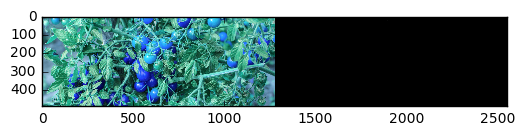

In [6]:
# loop over the boundaries
for (lower, upper) in boundaries:
    # create NumPy arrays from the boundaries
    lower = np.array(lower, dtype = "uint8")
    upper = np.array(upper, dtype = "uint8")
 
    # find the colors within the specified boundaries and apply
    # the mask
    mask = cv2.inRange(image, lower, upper)
    output = cv2.bitwise_and(image, image, mask = mask)
    
    plt.imshow(np.hstack([image, output]))
 
    # show the images
    # cv2.imshow("images", np.hstack([image, output]))
    # cv2.waitKey(0)

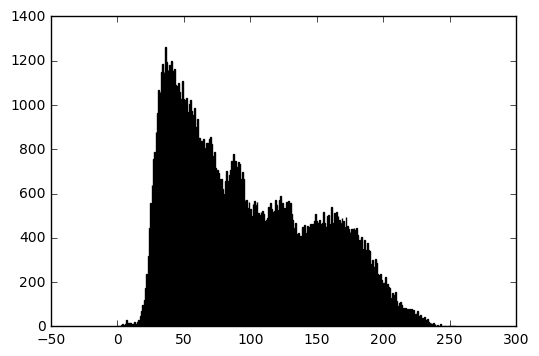

In [7]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from skimage import data
coins = data.coins()
bins=np.arange(0,256)
hist, bins = np.histogram(coins, bins=bins)

#hist, bins = np.histogram(x, bins=50)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.show()

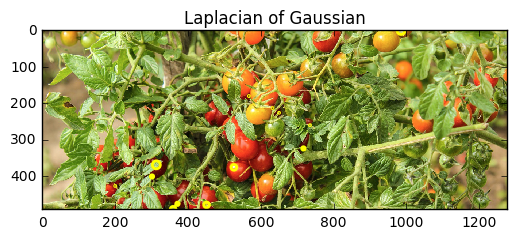

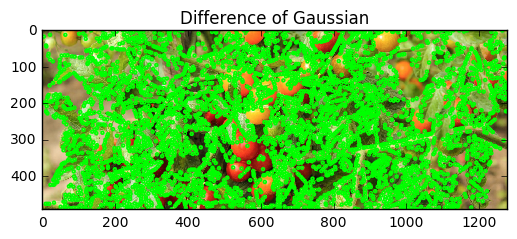

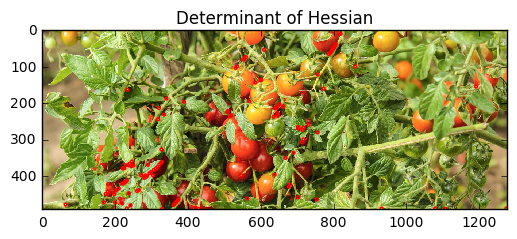

In [9]:
from matplotlib import pyplot as plt
from skimage import data
from skimage.feature import blob_dog, blob_log, blob_doh
from math import sqrt
from skimage.color import rgb2gray
from scipy import misc # try

image = misc.imread('t1.png')
image_gray = image[:,:,1]

blobs_log = blob_log(image_gray, max_sigma=10, num_sigma=5, threshold=.3)
# Compute radii in the 3rd column.
blobs_log[:, 2] = blobs_log[:, 2] * sqrt(2)

blobs_dog = blob_dog(image_gray, max_sigma=2, threshold=.051)
blobs_dog[:, 2] = blobs_dog[:, 2] * sqrt(2)

blobs_doh = blob_doh(image_gray, max_sigma=2, threshold=.01)

blobs_list = [blobs_log, blobs_dog, blobs_doh]
colors = ['yellow', 'lime', 'red']
titles = ['Laplacian of Gaussian', 'Difference of Gaussian',
          'Determinant of Hessian']
sequence = zip(blobs_list, colors, titles)

for blobs, color, title in sequence:
    fig, ax = plt.subplots(1, 1)
    ax.set_title(title)
    ax.imshow(image, interpolation='nearest')
    for blob in blobs:
        y, x, r = blob
        c = plt.Circle((x, y), r, color=color, linewidth=2, fill=False)
        ax.add_patch(c)

plt.show()

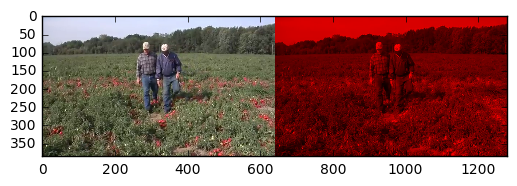

In [31]:
from matplotlib import pyplot as plt
import numpy as np
import cv2
%matplotlib inline
from copy import deepcopy
image = cv2.imread('t2.png')
i = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
img = deepcopy(i)
##plt.imshow(i)
just_red = deepcopy(i[:,:,0])
#i = cv2.imread()
green_off = deepcopy(i)
green_off[:,:,1] = 0
blue_green_off = deepcopy(green_off)
blue_green_off[:,:,2] = 0
#print (i.shape, red.shape)
#plt.imshow(red, cmap='gray')
##plt.imshow(blue_green_off)
plot_image = np.concatenate((i, blue_green_off), axis=1)
plt.imshow(plot_image)

32209
213.734453103


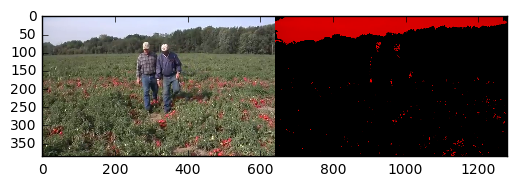

In [32]:
blue_green_off[(blue_green_off > 250)] = 0
blue_green_off[(blue_green_off < 200)] = 0
##plt.imshow(blue_green_off)
plot_image = np.concatenate((i, blue_green_off), axis=1)
plt.imshow(plot_image)
data = blue_green_off[blue_green_off>0]
print (len(data))
avg = np.mean(data)
print (avg)

In [28]:
hist, bins = np.histogram(data)

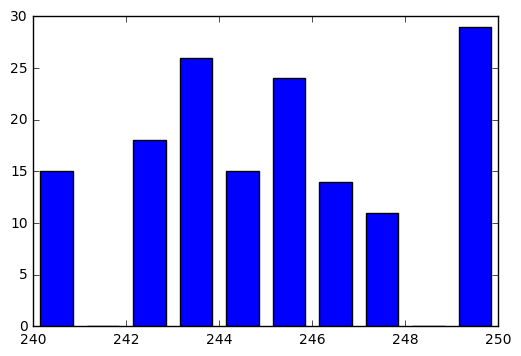

In [29]:
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.show()

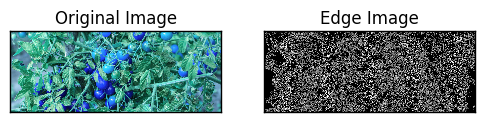

In [14]:
img = cv2.imread('t1.png')
edges = cv2.Canny(img,100,10)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

26919.0 39


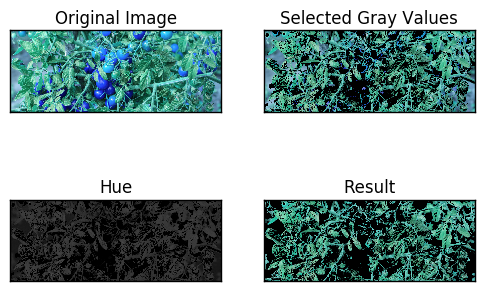

In [15]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


img = cv2.imread('t1.png')

#get rid of very bright and very dark regions
delta=30
lower_gray = np.array([delta, delta,delta])
upper_gray = np.array([255-delta,255-delta,255-delta])
# Threshold the image to get only selected
mask = cv2.inRange(img, lower_gray, upper_gray)
# Bitwise-AND mask and original image
res = cv2.bitwise_and(img,img, mask= mask)

#Convert to HSV space
HSV_img = cv2.cvtColor(res, cv2.COLOR_BGR2HSV)
hue = HSV_img[:, :, 0]

#select maximum value of H component from histogram
hist = cv2.calcHist([hue],[0],None,[256],[0,256])
hist= hist[1:, :] #suppress black value
elem = np.argmax(hist)
print np.max(hist), np.argmax(hist)

tolerance=10
lower_gray = np.array([elem-tolerance, 0,0])
upper_gray = np.array([elem+tolerance,255,255])
# Threshold the image to get only selected
mask = cv2.inRange(HSV_img, lower_gray, upper_gray)
# Bitwise-AND mask and original image
res2 = cv2.bitwise_and(img,img, mask= mask)


titles = ['Original Image', 'Selected Gray Values', 'Hue', 'Result']
images = [img, res, hue, res2]
for i in xrange(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()